# DBA4811 Final Project EDA

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
warnings.simplefilter("ignore", UserWarning)

## 1. Read in and view initial data

In [2]:
df = pd.read_csv("stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.shape

(5110, 12)

In [5]:
df.describe(include = "all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


## 2. Dataset Description and Data Dictionary

Our initial dataset consists of **5,110** entries, each representing a former patient at BrightLife Hospital, with **12** columns each representing various features about these patients. These features are a mix of numeric, categorical, and binary data types that could have an impact on a patient developing a stroke.

**Initial Features**
- `id` (int64): The index of each row, serving only as an identifier and not influencing the target variable.
- `gender` (object): The gender of the customer, possibly affecting the chances of them developing a stroke.
- `age` (float64): Age can have a significant influence on a patient"s chances of developing a stroke.
- `hypertension` (int64):  Indicates whether the patient has hypertension (high blood pressure), with 1 for yes and 0 for no. Hypertension is a known risk factor for stroke, making this variable crucial for predicting stroke likelihood.
- `heart_disease` (int64): Denotes whether the patient has any form of heart disease, with 1 for yes and 0 for no. Heart disease is another significant risk factor that can increase the probability of a stroke.
- `ever_married` (object): Reflects the marital status of the patient, categorized as "Yes" if they have ever been married and "No" otherwise. Marital status can be linked to social and emotional support, which may impact health outcomes including stroke risk.
- `work_type` (object): Describes the type of occupation the patient is engaged in. Categories might include "children" (not working), "Govt_job", "Never_worked", "Private", and "Self-employed". Different work types might expose individuals to varying stress levels and health impacts, influencing stroke risk.
- `residence_type` (object): Indicates the type of area where the patient lives, such as "Urban" or "Rural". Environmental factors and lifestyle differences between these areas can affect health, including the risk of stroke.
- `avg_glucose_level` (float64): Represents the average blood glucose level of the patient (in mg/dL). Elevated glucose levels can be an indicator of diabetes or other health conditions that are associated with an increased risk of stroke.
- `bmi` (float64):  Body Mass Index of the patient, calculated as weight in kilograms divided by the square of height in meters. BMI is used to categorize patients as underweight, normal weight, overweight, or obese, with obesity being a risk factor for stroke.
- `smoking_status` (object): Describes the smoking habits of the patient, categorized as "formerly smoked", "never smoked", "smokes", or "Unknown". Smoking is a well-documented risk factor for many diseases, including stroke.

**Target**
- `stroke` (int64): A binary target variable, with 1 indicating they've developed a stroke or 0 indicating they have not.

## 3. Data Cleaning and Preprocessing

In [6]:
# Check for missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Fill in missing values with suitable replacement
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

# Verify that missing values are replaced
print(df.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [8]:
# Replace categorical values with better descriptors to fit a consistent style
replace_dict = {
    "gender": {"Female": "female", "Male": "male"},
    "ever_married": {"Yes": "yes", "No": "no"},
    "work_type": {"Private": "employed", "Self-employed": "employed", "children": "unemployed", "Govt_job": "employed", "Never_worked": "unemployed"},
    "residence_type": {"Urban": "urban", "Rural": "rural"}, 
    "smoking_status": {"never smoked": "never", "Unknown": "unknown", "formerly smoked": "former", "smokes": "smoker"}
}

# Apply replacements
df = df.replace(replace_dict)

# Rename some columns for better description of features
df.rename(columns = {"work_type": "employment_status", "smoking_status": "smoker_status"}, inplace = True)

# Drop unnecessary columns
df.drop("id", axis = 1, inplace = True)

df

,gender,age,hypertension,heart_disease,ever_married,employment_status,residence_type,avg_glucose_level,bmi,smoker_status,stroke
0,male,67.0,0,1,yes,employed,urban,228.69,36.6,former,1
1,female,61.0,0,0,yes,employed,rural,202.21,28.1,never,1
2,male,80.0,0,1,yes,employed,rural,105.92,32.5,never,1
3,female,49.0,0,0,yes,employed,urban,171.23,34.4,smoker,1
4,female,79.0,1,0,yes,employed,rural,174.12,24.0,never,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,female,80.0,1,0,yes,employed,urban,83.75,28.1,never,0
5106,female,81.0,0,0,yes,employed,urban,125.20,40.0,never,0
5107,female,35.0,0,0,yes,employed,rural,82.99,30.6,never,0
5108,male,51.0,0,0,yes,employed,rural,166.29,25.6,former,0


In [9]:
categorical_features = ["gender", "hypertension", "heart_disease", "ever_married", "employment_status", "residence_type", "smoker_status"]
for i in categorical_features:
    print(df[i].value_counts(), "\n")

gender
female    2994
male      2116
Name: count, dtype: int64 

hypertension
0    4612
1     498
Name: count, dtype: int64 

heart_disease
0    4834
1     276
Name: count, dtype: int64 

ever_married
yes    3353
no     1757
Name: count, dtype: int64 

employment_status
employed      4401
unemployed     709
Name: count, dtype: int64 

residence_type
urban    2596
rural    2514
Name: count, dtype: int64 

smoker_status
never      1892
unknown    1544
former      885
smoker      789
Name: count, dtype: int64 



In [10]:
# One-hot encode categorical features
encoded_df = df.copy()
encoded_df.drop(categorical_features, axis = 1, inplace = True)

dummies = pd.get_dummies(df[categorical_features], drop_first = True, dtype = "int")
encoded_df = pd.concat([encoded_df, dummies], axis = 1)
encoded_df

,age,avg_glucose_level,bmi,stroke,hypertension,heart_disease,gender_male,ever_married_yes,employment_status_unemployed,residence_type_urban,smoker_status_never,smoker_status_smoker,smoker_status_unknown
0,67.0,228.69,36.6,1,0,1,1,1,0,1,0,0,0
1,61.0,202.21,28.1,1,0,0,0,1,0,0,1,0,0
2,80.0,105.92,32.5,1,0,1,1,1,0,0,1,0,0
3,49.0,171.23,34.4,1,0,0,0,1,0,1,0,1,0
4,79.0,174.12,24.0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,28.1,0,1,0,0,1,0,1,1,0,0
5106,81.0,125.20,40.0,0,0,0,0,1,0,1,1,0,0
5107,35.0,82.99,30.6,0,0,0,0,1,0,0,1,0,0
5108,51.0,166.29,25.6,0,0,0,1,1,0,0,0,0,0


## 4.  Exploratory Data Analysis

### 4.1 Balance of target classes

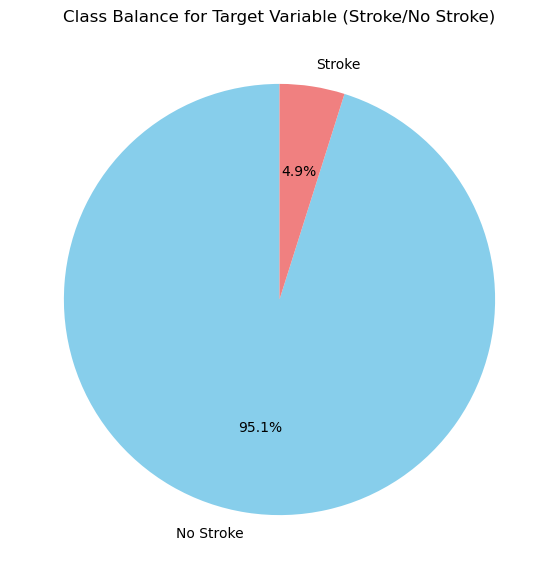

In [11]:
# Count the occurrences of each class (0 and 1)
counts = df["stroke"].value_counts()

# Define labels for the pie chart (e.g., "Class 0" and "Class 1")
labels = ["No Stroke", "Stroke"]

# Create the pie chart
plt.figure(figsize = (7, 7))
plt.pie(counts, labels = labels, autopct = "%1.1f%%", startangle = 90, colors = ["skyblue", "lightcoral"])
plt.title("Class Balance for Target Variable (Stroke/No Stroke)")
plt.show()

Note the extreme imbalance of classes in the dataset.

### 4.2 Numeric Feature Analysis

In [12]:
numeric_features = ["age", "avg_glucose_level", "bmi"]

def create_numeric_plots(df, variable):
    plt.figure(figsize = (16, 4))

    # Plot histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Plot probability plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # Plot boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.suptitle(f"Distribution Analysis of {variable}", fontsize = 14, fontweight = "bold", y = 1.01)
    plt.show()

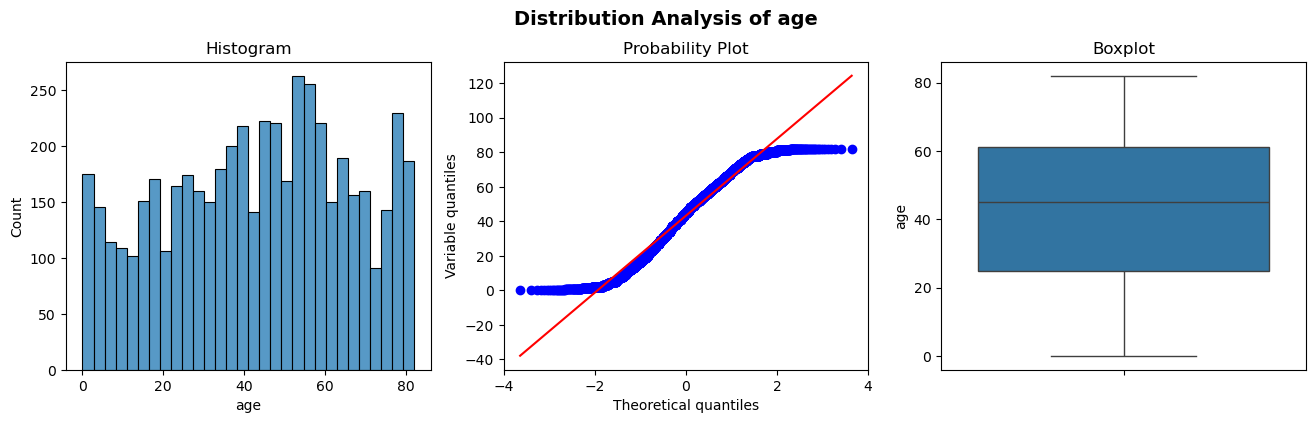

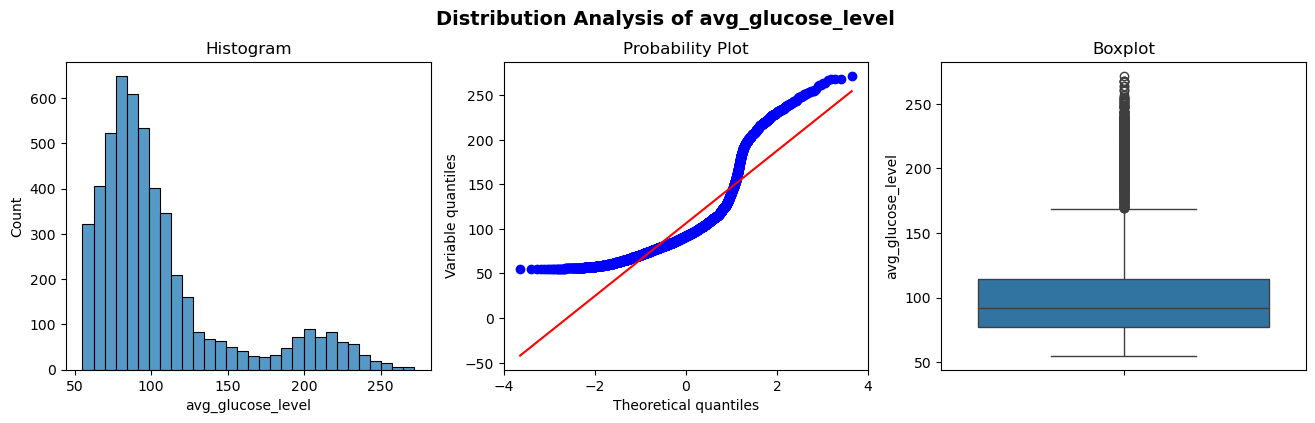

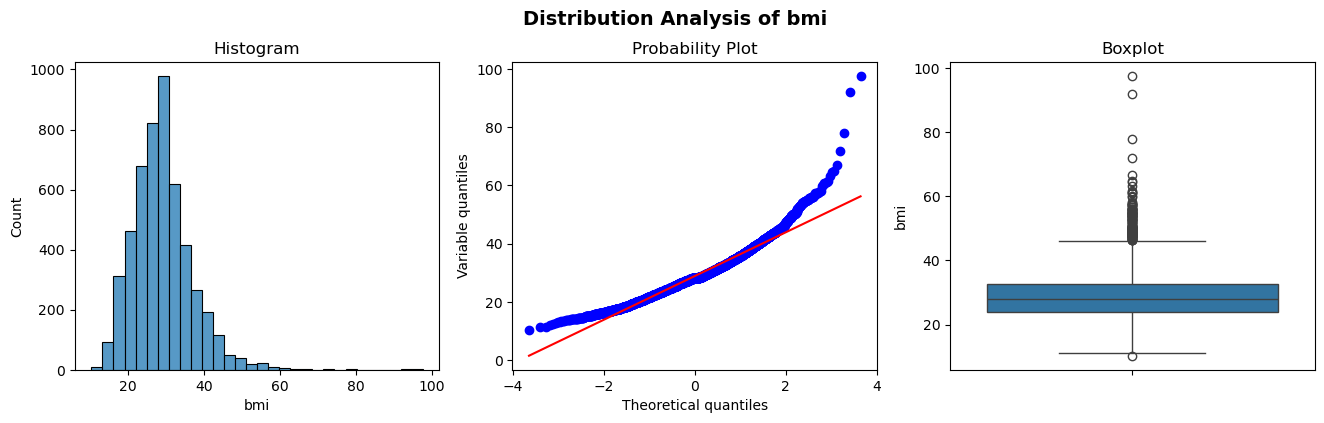

In [13]:
for feature in numeric_features:
    create_numeric_plots(df, feature)

**Analysis of Individual BMI, Age, and Average Glucose Level Distributions**

`age`<br>
The age distribution appears relatively uniform, without a clear skew. The probability plot shows deviations from normality at both tails, indicating that the age distribution does not strictly follow a normal curve. The boxplot confirms a well-spread age range with no significant outliers, suggesting a balanced dataset.

`avg_glucose_level`<br>
The average glucose level is highly right-skewed, with most values clustering between 70 and 150 but extending beyond 250. The probability plot reveals strong deviations from normality, especially in the upper range. The boxplot shows numerous high-end outliers, indicating a subset of individuals with abnormally high glucose levels, potentially linked to diabetes or metabolic disorders. Applying a log transformation may help normalize this variable.

`bmi`<br>
The BMI distribution is right-skewed, with most values between 15 and 40, but a long tail extending beyond 60. The probability plot confirms non-normality, as higher BMI values deviate from the expected normal trend. The boxplot highlights multiple extreme outliers above 50, suggesting a subset of individuals with significantly higher BMI.

### 4.3 Numeric Feature Scatter Matrix

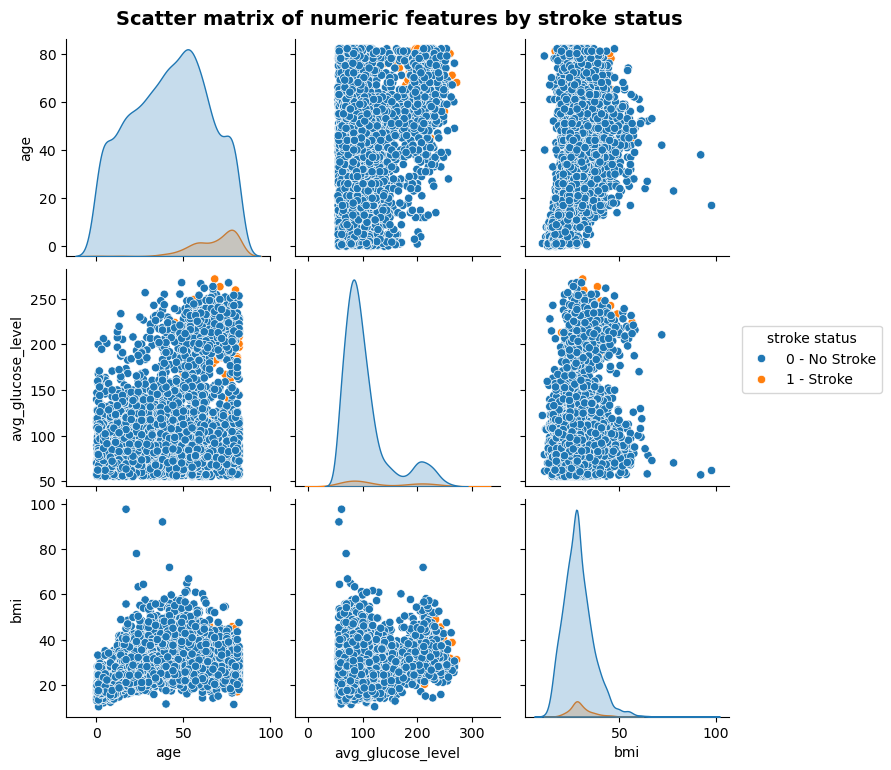

In [14]:
# Stroke is the hue variable
ax = sns.pairplot(encoded_df[numeric_features + ["stroke"]], hue = "stroke")
ax._legend.remove()

# Create legend to differentiate target variable
handles = ax._legend_data.values()
labels = ["0 - No Stroke", "1 - Stroke"]

plt.figlegend(
    handles = handles, 
    labels = labels, 
    title = "stroke status", 
    loc = "lower center",
    bbox_to_anchor = (1.01, 0.5)
)

plt.suptitle("Scatter matrix of numeric features by stroke status", fontsize = 14, fontweight = "bold", y = 1.02)
plt.show()

**Analysis of Relationships between BMI, Age, and Average Glucose Level in the Scatter Matrix**

Key observations:

1. **Distribution of patients**: The blue dots (no stroke) vastly outnumber the orange dots (stroke), indicating an imbalanced dataset with stroke being a relatively rare outcome.

2. **Age patterns**: 
   - The top-left density plot shows stroke cases (orange) tend to occur more frequently in older age groups
   - The age scatter plots confirm stroke cases predominantly appear among older patients

3. **Average glucose level**:
   - The middle row shows stroke cases appear more frequently at higher glucose levels
   - The density plot shows stroke cases have a shifted distribution toward higher glucose values compared to non-stroke cases

4. **BMI (Body Mass Index)**:
   - The distribution appears slightly different between stroke and non-stroke groups
   - Stroke cases seem moderately more prevalent in mid-to-high BMI ranges

5. **Relationships between variables**:
   - No clear linear separation between stroke/non-stroke groups in any single feature or pair of features
   - Age and glucose level appear to have the strongest individual associations with stroke status

This visualization suggests that while age and glucose level may be important predictors of stroke risk, no single feature or simple combination of these three features alone creates a clear boundary between the groups, indicating that stroke prediction likely requires more complex modeling approaches or additional features.

### 4.4 Categorical Feature Analysis

In [15]:
# Create function to generate categorical bar chart comparison between stroke and non-stroke patients
sns.set_style("darkgrid")

# Assuming df is your DataFrame, cat_feature is a categorical feature in the DataFrame and target_col is the classification target
def create_categorical_plot(df, cat_feature, target_col):
    plt.figure(figsize = (8, 4))

    # Corrected the arguments for sns.countplot
    ax = sns.countplot(data = df, y = cat_feature, hue = target_col)

    # Adding labels inside the bars
    for container in ax.containers:
        ax.bar_label(container, fontsize = 10, label_type = "center")

    ax.legend(title = "Stroke Status", labels = ["0 - No Stroke", "1 - Stroke"], bbox_to_anchor = (1.01, 0.5), loc = "center left")
    plt.title(f"Stroke Occurrence by {cat_feature}")
    plt.show()

    # Print stroke rates by category
    rates = df.groupby(cat_feature)[target_col].mean()
    print(f"Stroke occurrence by {cat_feature}")
    print(((rates * 100).round(2).astype(str) + "%").to_string(header = False))

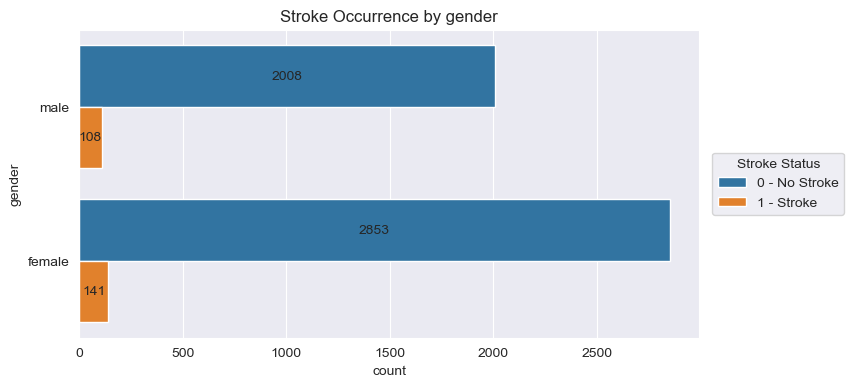

Stroke occurrence by gender
female    4.71%
male       5.1%


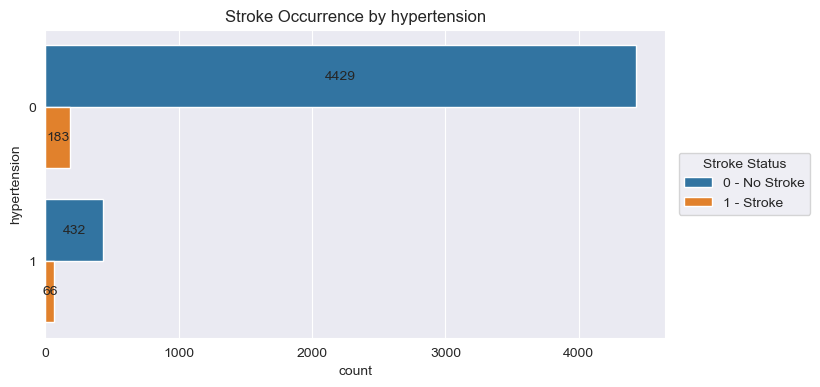

Stroke occurrence by hypertension
0     3.97%
1    13.25%


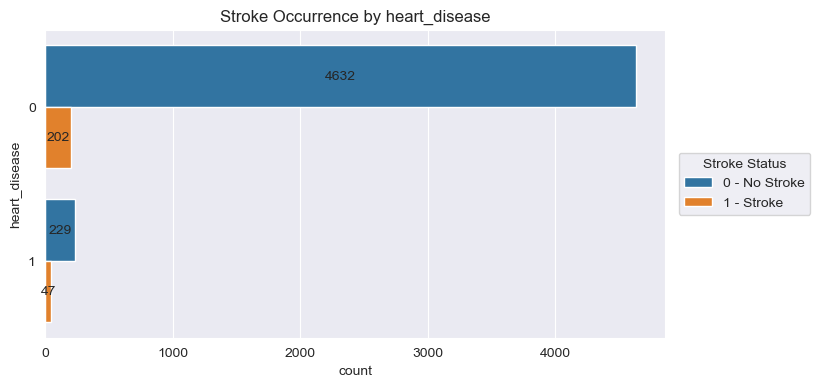

Stroke occurrence by heart_disease
0     4.18%
1    17.03%


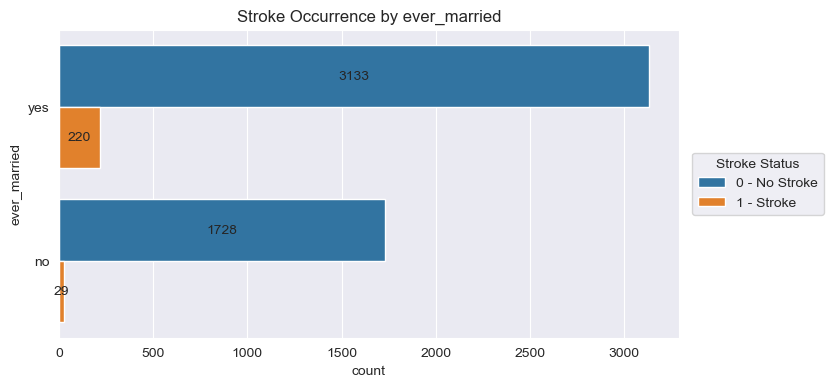

Stroke occurrence by ever_married
no     1.65%
yes    6.56%


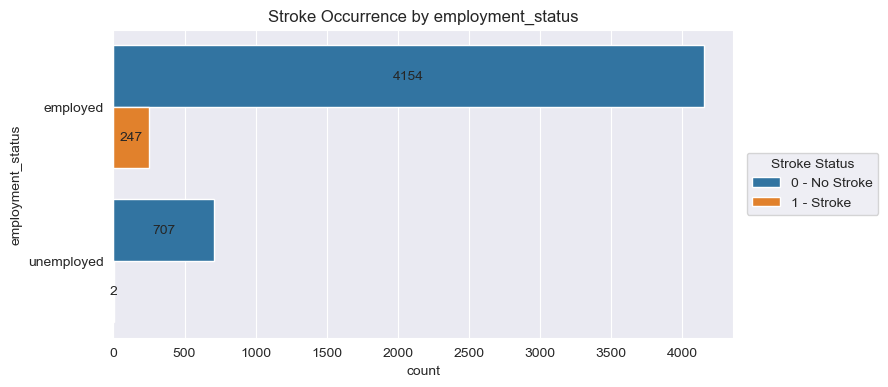

Stroke occurrence by employment_status
employed      5.61%
unemployed    0.28%


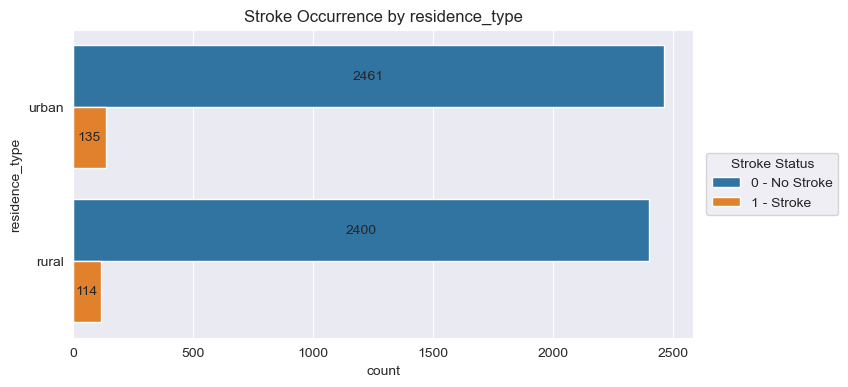

Stroke occurrence by residence_type
rural    4.53%
urban     5.2%


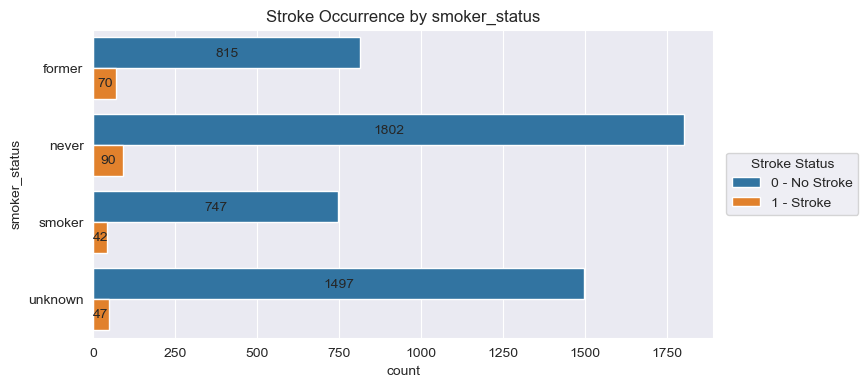

Stroke occurrence by smoker_status
former     7.91%
never      4.76%
smoker     5.32%
unknown    3.04%


In [16]:
for feature in categorical_features:
    create_categorical_plot(df, feature, "stroke")

Based on the above plots of stroke rate data across different categorical variables, here's a summary:

1. **Gender**: Males have a slightly higher stroke rate (5.1%) than females (4.7%).

2. **Hypertension**: People with hypertension have a significantly higher stroke rate (13.3%) compared to those without (4.0%).

3. **Heart Disease**: Individuals with heart disease show a notably higher stroke rate (17.0%) versus those without (4.2%).

4. **Marital Status**: Married individuals ("yes") have a much higher stroke rate (6.6%) than unmarried individuals (1.7%).

5. **Employment**: Employed people have a substantially higher stroke rate (5.6%) compared to unemployed people (0.3%).

6. **Residence Type**: Urban residents have a slightly higher stroke rate (5.2%) than rural residents (4.5%).

7. **Smoking Status**: Former smokers have the highest stroke rate (7.9%), followed by current smokers (5.3%), never-smokers (4.8%), and those with unknown smoking status (3.0%).

The data suggests that hypertension, heart disease, being married, and being a former/current smoker are associated with higher stroke rates in this dataset.

### 4.4 Feature Correlation Matrix

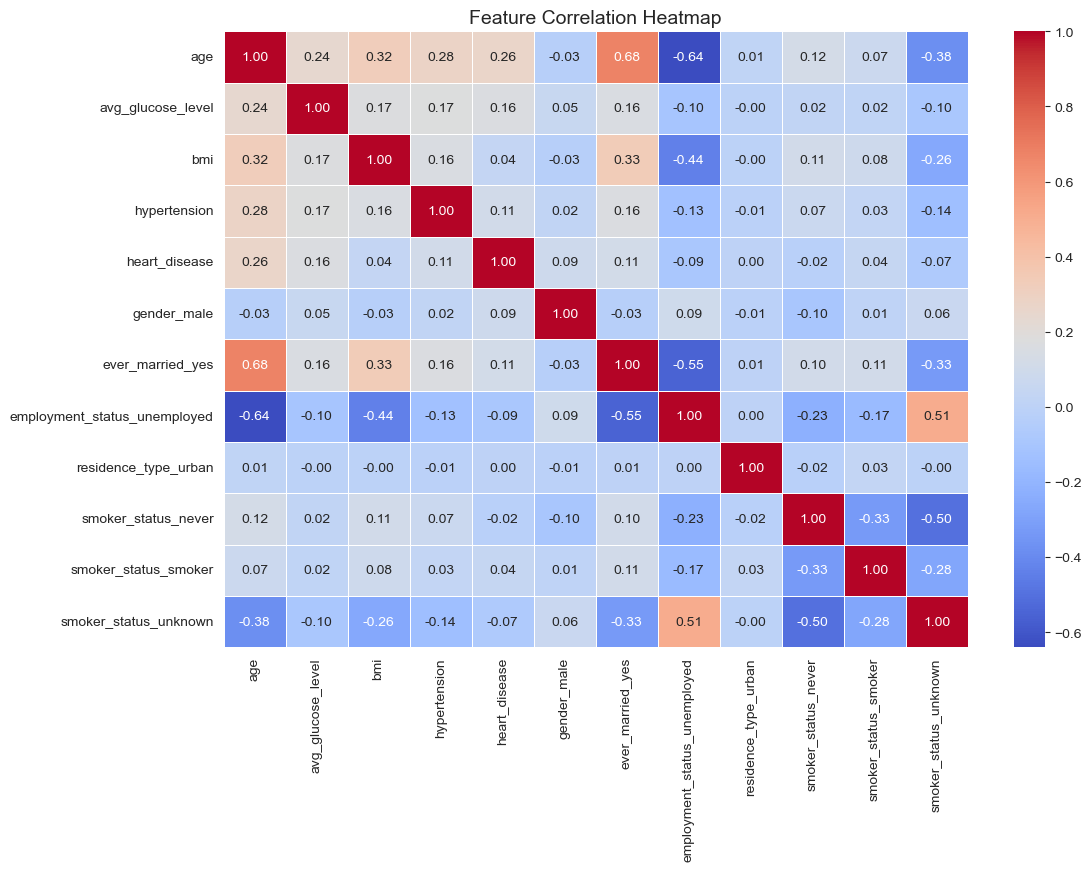

In [17]:
# Compute the correlation matrix for all features (with encoding)
corr_matrix = encoded_df.drop(columns = ["stroke"]).corr()

# Plot the heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidths = 0.5)
plt.title("Feature Correlation Heatmap", fontsize = 14)
plt.show()

The heatmap reveals strong correlations, such as age with `ever_married_yes` (0.68) and age with `employment_status_unemployment` (-0.64), indicating older individuals are more likely married and employed. `bmi` and `ever_married_yes` (0.33) and `hypertension` and `age` (0.28) show moderate links to health. Weak correlations suggest gender and health conditions are not strongly related, while `smoker_status_unknown` and `employment_status_unemployment` (0.51) may indicate missing data patterns. These findings help in feature selection by identifying redundancy (e.g., age and marital status) and ensuring weak predictors don’t add noise to models.

## 5. Preliminary logistic regression

In [18]:
# Generate preliminary logistic regression for causal analysis
logit_model = smf.logit(f"stroke ~ {' + '.join(encoded_df.drop('stroke', axis = 1).columns)}", data = encoded_df)
result_logit = logit_model.fit()
print(result_logit.summary())

Optimization terminated successfully.
         Current function value: 0.155253
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5097
Method:                           MLE   Df Model:                           12
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                  0.2028
Time:                        13:06:37   Log-Likelihood:                -793.34
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 6.277e-79
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -7.5523      0.587    -12.859      0.00

*Model Overview*

The logistic regression model was built to predict the likelihood of stroke based on various demographic and health-related features. The model converged successfully after 10 iterations with a pseudo R-squared of 0.2028, indicating that approximately 20.28% of the variance in stroke occurrence is explained by the predictors in the model.

*Statistical Significance Assessment*

At the 5% significance level (p < 0.05), the following variables are statistically significant:

1. **Age** (p < 0.001)
   - Coefficient: 0.0717
   - For each additional year of age, the log odds of stroke increase by 0.0717
   - This is a strong positive relationship, suggesting that older individuals have higher stroke risk

2. **Average Glucose Level** (p = 0.001)
   - Coefficient: 0.0041
   - Higher blood glucose levels are associated with increased stroke risk
   - Even with this small coefficient, the effect is statistically significant

3. **Hypertension** (p = 0.017)
   - Coefficient: 0.3939
   - Presence of hypertension increases the log odds of stroke by 0.3939
   - This confirms the clinical understanding that hypertension is a significant risk factor

*Non-Significant Variables*

The following variables did not show statistical significance at the 5% level:

1. **BMI** (p = 0.912)
2. **Heart Disease** (p = 0.130)
3. **Gender** (p = 0.884)
4. **Marital Status** (p = 0.460)
5. **Employment Status** (p = 0.383)
6. **Residence Type** (p = 0.536)
7. **Smoking Status** categories (all p > 0.05)

*Reference Categories*

The model uses the following reference categories (which are omitted from the output):
- Gender: Female
- Marital Status: Not married
- Employment Status: Employed
- Residence Type: Rural
- Smoking Status: Former smoker

*Model Performance*

- **Log-Likelihood**: -793.34
- **LL-Null**: -995.19
- **Likelihood Ratio Test**: Highly significant (p-value: 6.277e-79)
- **Pseudo R-squared**: 0.2028

The significant improvement from the null model (LLR p-value < 0.001) indicates that the predictors collectively have explanatory power.

*Implications for Machine Learning Model Development*

This preliminary logistic regression provides valuable insights for developing more advanced machine learning models:

1. **Feature Selection**:
   - The significant features (age, glucose level, hypertension) should be prioritized in future models
   - Non-significant features might be candidates for removal, though they should be tested in other model architectures before elimination

2. **Model Selection**:
   - The moderate pseudo R-squared (0.2028) suggests that more complex models might capture additional patterns
   - Consider ensemble methods like Random Forest or Gradient Boosting, which can model non-linear relationships that logistic regression might miss

3. **Handling Class Imbalance**:
   - The relatively low prevalence of the positive class (stroke) might require techniques like SMOTE, class weighting, or threshold adjustment

4. **Feature Engineering**:
   - Consider interaction terms, particularly between age and other risk factors
   - Non-linear transformations of continuous variables (especially age and glucose) might improve predictive power

5. **Regularization**:
   - The presence of many non-significant predictors suggests that regularization techniques (L1/L2) could improve model generalization

6. **Clinical Relevance**:
   - The model confirms known risk factors (age, glucose, hypertension)
   - Future models should maintain interpretability to be clinically useful while potentially improving predictive accuracy

The results suggest that an optimal approach might be to develop both a simpler model focused on the significant variables (for interpretability and clinical use) and a more complex model incorporating all variables (for maximum predictive power).

# Convert pre-processed dataframe to .csv file
encoded_df.to_csv("data.csv", index = False)